# The adverse health effects of air pollution - are we making any progress?

<img src=files/air.jpg width="900">

**Credit:**  [Flickr/E4C](https://www.flickr.com/people/44221799@N08/) 

In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings

warnings.filterwarnings("ignore")  # Suppress all warnings

## Introduction

**Business Context.** Air pollution is a very serious issue that the global population is currently dealing with. The abundance of air pollutants is not only contributing to global warming, but it is also causing problematic health issues to the population. There have been numerous efforts to protect and improve air quality across most nations. However, it seems that we are making very little progress. One of the main causes of this is the fact that the majority of air pollutants are derived from the burning of fossil fuels such as *coal*. Big industries and several other economical and political factors have slowed the progress towards the use of renewable energy by promoting the use of fossil fuels. Nevertheless, if we educate the general population and create awareness of this issue, we will be able to overcome this problem in the future.      

For this case, you have been hired as a data science consultant for an important environmental organization. In order to promote awareness of environmental and greenhouse gas issues, your client is interested in a study of **plausible impacts of air contamination on the health of the global population**. They have gathered some *raw* data provided by the [World Health Organization](https://www.who.int/), [The Institute for Health Metrics and Evaluation](http://www.healthdata.org/) and the [World Bank Group](https://www.worldbank.org/). Your task is to conduct data analysis, search for potential information, and create visualizations that the client can use for their campaigns and grant applications. 

**Analytical Context.** You are given a folder, named ```files``` with *raw* data. This data contains quite a large number of variables and it is in a fairly disorganized state. In addition, one of the datasets contains very poor documentation, segmented into several datasets. Your objective will be to:

1. Extract and clean the relevant data. You will have to manipulate several datasets to obtain useful information for the case. 
2. Conduct Exploratory Data Analysis. You will have to create meaningful plots, formulate meaningful hypotheses and study the relationship between various indicators related to air pollution.

Additionally, the client has some broad questions they would like to answer:
1. Are we making any progress in reducing the amount of emitted pollutants across the globe?
2. Which are the critical regions where we should start environmental campaigns?
3. Are we making any progress in the prevention of deaths related to air pollution?
4. Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? 

## Extracting and cleaning relevant data

Let's take a look at the data provided by the client in the ```files``` folder. There, we see another folder  named ```WDI_csv``` with several CSV files corresponding to the World Bank's primary [World Development Indicators](https://datacatalog.worldbank.org/dataset/world-development-indicators). The client stated that this data may contain some useful information relevant to our study, but they have not told us anything aside from that. Thus, we are on our own in finding and extracting the relevant data for our study. This we will do next. 

Let's take a peek at the file ```WDIData.csv```:

In [2]:
WDI_data = pd.read_csv("./files/WDI_csv/WDIData.csv")
print(WDI_data.columns)
print(WDI_data.info())
WDI_data.head()

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377256 entries, 0 to 377255
Data columns (total 65 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    377256 non-null  object 
 1   Country Code    377256 non-null  object 
 2   Indicator Name  377256 non-null  object 
 3   Indicator Co

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN


The data seems to have a large number of indicators dating from 1960. There are also columns containing country names and codes. Notice that the first couple of rows say ```Arab World```, which may indicate that the data contains broad regional data as well. We notice also that there are at least 100,000 entries with ```NaN``` values for each year column.

Since we are interested in environmental indicators, we must get rid of any rows not relevant to our study. However, the number of indicators seems to be quite large and a manual inspection seems impossible. Let's load the file ```WDISeries.csv``` which seems to contain more information about the indicators:

In [3]:
WDI_ids = pd.read_csv("./files/WDI_csv/WDISeries.csv")
print(WDI_ids.columns)
WDI_ids.head()

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN


Bingo! The ```WDI_ids``` DataFrame contains a column named ```Topic```. Moreover, it seems that *Environment* is listed as a key topic in the column.

### Exercise 1:

Extract all the rows that have the topic key *Environment* in ```WDI_ids```. Add to the resulting DataFrame a new column named ```Subtopic``` which contains the corresponding subtopic of the indicator. For example, the subtopic of ```Environment: Agricultural production``` is ```Agricultural production```. Which subtopics do you think are of interest to us?

**Hint:** Remember that you can apply string methods to Series using the ```str()``` method of ```pandas```. 

**Answer.**

In [4]:
WDI_ids['Topic key']=WDI_ids['Topic'].str.split(':',1,expand=True)[0]
WDI_ids['Subtopic']=WDI_ids['Topic'].str.split(':',1,expand=True)[1]
df=WDI_ids[WDI_ids['Topic key']=='Environment'].copy()
df['Subtopic'].unique()

array([' Agricultural production', ' Land use',
       ' Energy production & use', ' Emissions',
       ' Biodiversity & protected areas', ' Density & urbanization',
       ' Freshwater', ' Natural resources contribution to GDP'],
      dtype=object)

We may find several of these subtopics relevant to our study, but probably the most interesting for us now is the ```Emissions``` subtopic.

### Exercise 2:

Use the results of Exercise 1 to create a new DataFrame with the history of all emissions indicators for countries and major regions. Call this new DataFrame ```Emissions_df```. How many emissions indicators are in the study?

**Answer.**

In [5]:
Emissions_df=df[df['Subtopic']==' Emissions'].merge(WDI_data,left_on='Series Code',right_on='Indicator Code',how='left')
print('There are ',len(Emissions_df['Indicator Name_x'].unique()), ' emissions indicators in the study: ')
list(Emissions_df['Indicator Name_x'].unique())

Emissions_df.drop(columns=['Indicator Name_y'],inplace=True)
Emissions_df.rename(columns={'Indicator Name_x':'Indicator Name'},inplace=True)

Emissions_df['Indicator Name'].unique()

There are  42  emissions indicators in the study: 


array(['CO2 intensity (kg per kg of oil equivalent energy use)',
       'CO2 emissions from gaseous fuel consumption (kt)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions (kg per 2010 US$ of GDP)', 'CO2 emissions (kt)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 emissions (metric tons per capita)',
       'CO2 emissions (kg per PPP $ of GDP)',
       'CO2 emissions (kg per 2011 PPP $ of GDP)',
       'CO2 emissions from solid fuel consumption (kt)',
       'CO2 emissions from solid fuel consumption (% of total)',
       'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)',
       'Other greenhouse gas emissions (% change from 1990)',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'Total greenhouse gas emissions (% change from 1990)',
       'HFC gas emissions (thousand metric tons of CO2 equ

-------

### Exercise 3:

The DataFrame ```Emissions_df``` has one column per year of observation. Data in this form is usually referred to as data in *wide format*, as the number of columns is high. However, it might be easier to query and filter the data if we had a single column containing the year in which each indicator was calculated. This way, *each observation will be represented by a single row*. Use the ```pandas``` function [```melt()```](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to reshape the ```Emissions_df``` data into *long format*. The resulting DataFrame should contain a pair of new columns named ```Year``` and ```Indicator Value```:

**Answer.**

In [6]:
Emissions_df=Emissions_df.melt(id_vars=(Emissions_df.iloc[:, 0:26]),value_vars=(Emissions_df.iloc[:, 26:]),var_name='Year',value_name=('Indicator Value'))
Emissions_df

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Related indicators,License Type,Unnamed: 20,Topic key,Subtopic,Country Name,Country Code,Indicator Code,Year,Indicator Value
0,EN.ATM.CO2E.EG.ZS,Environment: Emissions,CO2 intensity (kg per kg of oil equivalent ene...,NaN,Carbon dioxide emissions from solid fuel consu...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,CC BY-4.0,NaN,Environment,Emissions,Arab World,ARB,EN.ATM.CO2E.EG.ZS,1960,NaN
1,EN.ATM.CO2E.EG.ZS,Environment: Emissions,CO2 intensity (kg per kg of oil equivalent ene...,NaN,Carbon dioxide emissions from solid fuel consu...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,CC BY-4.0,NaN,Environment,Emissions,Caribbean small states,CSS,EN.ATM.CO2E.EG.ZS,1960,NaN
2,EN.ATM.CO2E.EG.ZS,Environment: Emissions,CO2 intensity (kg per kg of oil equivalent ene...,NaN,Carbon dioxide emissions from solid fuel consu...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,CC BY-4.0,NaN,Environment,Emissions,Central Europe and the Baltics,CEB,EN.ATM.CO2E.EG.ZS,1960,3.687416
3,EN.ATM.CO2E.EG.ZS,Environment: Emissions,CO2 intensity (kg per kg of oil equivalent ene...,NaN,Carbon dioxide emissions from solid fuel consu...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,CC BY-4.0,NaN,Environment,Emissions,Early-demographic dividend,EAR,EN.ATM.CO2E.EG.ZS,1960,1.573502
4,EN.ATM.CO2E.EG.ZS,Environment: Emissions,CO2 intensity (kg per kg of oil equivalent ene...,NaN,Carbon dioxide emissions from solid fuel consu...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,CC BY-4.0,NaN,Environment,Emissions,East Asia & Pacific,EAS,EN.ATM.CO2E.EG.ZS,1960,2.858775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676363,EN.CO2.TRAN.ZS,Environment: Emissions,CO2 emissions from transport (% of total fuel ...,NaN,CO2 emissions from transport contains emission...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Use and distribution of these data are subject...,NaN,Environment,Emissions,Virgin Islands (U.S.),VIR,EN.CO2.TRAN.ZS,Unnamed: 64,NaN
676364,EN.CO2.TRAN.ZS,Environment: Emissions,CO2 emissions from transport (% of total fuel ...,NaN,CO2 emissions from transport contains emission...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Use and distribution of these data are subject...,NaN,Environment,Emissions,West Bank and Gaza,PSE,EN.CO2.TRAN.ZS,Unnamed: 64,NaN
676365,EN.CO2.TRAN.ZS,Environment: Emissions,CO2 emissions from transport (% of total fuel ...,NaN,CO2 emissions from transport contains emission...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Use and distribution of these data are subject...,NaN,Environment,Emissions,"Yemen, Rep.",YEM,EN.CO2.TRAN.ZS,Unnamed: 64,NaN
676366,EN.CO2.TRAN.ZS,Environment: Emissions,CO2 emissions from transport (% of total fuel ...,NaN,CO2 emissions from transport contains emission...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Use and distribution of these data are subject...,NaN,Environment,Emissions,Zambia,ZMB,EN.CO2.TRAN.ZS,Unnamed: 64,NaN


-------

### Exercise 4:

The column ```Indicator Value``` of the new ```Emissions_df``` contains a bunch of ```NaN``` values. Additionally, the ```Year``` column contains an ```Unnamed: 64``` value. What procedure should we follow to clean these missing values in our DataFrame? Proceed with your suggested cleaning process.

**Answer.**

In [7]:
Emissions_df=Emissions_df[Emissions_df['Year']!='Unnamed: 64']
#I erase the rows with Year==Unnamed 64, because it is not a year and all the 'Indicator value' for this 'Year' were 0

Emissions_df.dropna(subset=['Indicator Value'],inplace=True)
#I erase the rows with NaN in Indicator values, its not useful for this case to have non values.
Emissions_df

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Related indicators,License Type,Unnamed: 20,Topic key,Subtopic,Country Name,Country Code,Indicator Code,Year,Indicator Value
2,EN.ATM.CO2E.EG.ZS,Environment: Emissions,CO2 intensity (kg per kg of oil equivalent ene...,NaN,Carbon dioxide emissions from solid fuel consu...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,CC BY-4.0,NaN,Environment,Emissions,Central Europe and the Baltics,CEB,EN.ATM.CO2E.EG.ZS,1960,3.687416
3,EN.ATM.CO2E.EG.ZS,Environment: Emissions,CO2 intensity (kg per kg of oil equivalent ene...,NaN,Carbon dioxide emissions from solid fuel consu...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,CC BY-4.0,NaN,Environment,Emissions,Early-demographic dividend,EAR,EN.ATM.CO2E.EG.ZS,1960,1.573502
4,EN.ATM.CO2E.EG.ZS,Environment: Emissions,CO2 intensity (kg per kg of oil equivalent ene...,NaN,Carbon dioxide emissions from solid fuel consu...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,CC BY-4.0,NaN,Environment,Emissions,East Asia & Pacific,EAS,EN.ATM.CO2E.EG.ZS,1960,2.858775
8,EN.ATM.CO2E.EG.ZS,Environment: Emissions,CO2 intensity (kg per kg of oil equivalent ene...,NaN,Carbon dioxide emissions from solid fuel consu...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,CC BY-4.0,NaN,Environment,Emissions,Europe & Central Asia,ECS,EN.ATM.CO2E.EG.ZS,1960,3.320837
9,EN.ATM.CO2E.EG.ZS,Environment: Emissions,CO2 intensity (kg per kg of oil equivalent ene...,NaN,Carbon dioxide emissions from solid fuel consu...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,CC BY-4.0,NaN,Environment,Emissions,Europe & Central Asia (excluding high income),ECA,EN.ATM.CO2E.EG.ZS,1960,1.573502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641252,EN.ATM.PM25.MC.ZS,Environment: Emissions,"PM2.5 air pollution, population exposed to lev...",NaN,Percent of population exposed to ambient conce...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,CC BY-4.0,NaN,Environment,Emissions,West Bank and Gaza,PSE,EN.ATM.PM25.MC.ZS,2017,100.000000
641253,EN.ATM.PM25.MC.ZS,Environment: Emissions,"PM2.5 air pollution, population exposed to lev...",NaN,Percent of population exposed to ambient conce...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,CC BY-4.0,NaN,Environment,Emissions,"Yemen, Rep.",YEM,EN.ATM.PM25.MC.ZS,2017,100.000000
641254,EN.ATM.PM25.MC.ZS,Environment: Emissions,"PM2.5 air pollution, population exposed to lev...",NaN,Percent of population exposed to ambient conce...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,CC BY-4.0,NaN,Environment,Emissions,Zambia,ZMB,EN.ATM.PM25.MC.ZS,2017,100.000000
641255,EN.ATM.PM25.MC.ZS,Environment: Emissions,"PM2.5 air pollution, population exposed to lev...",NaN,Percent of population exposed to ambient conce...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,CC BY-4.0,NaN,Environment,Emissions,Zimbabwe,ZWE,EN.ATM.PM25.MC.ZS,2017,100.000000


-------

### Exercise 5:

Split the ```Emissions_df``` into two DataFrames, one containing only countries and the other containing only regions. Name these ```Emissions_C_df``` and ```Emissions_R_df``` respectively.

**Hint:** You may want to inspect the file ```WDICountry.csv``` for this task. Region country codes may be found by looking at ```null``` values of the ```Region``` column in ```WDICountry```.

**Answer.**

In [8]:
WDI_country = pd.read_csv("./files/WDI_csv/WDICountry.csv")
Emissions_df=Emissions_df.merge(WDI_country[['Country Code','Region','Income Group']],on='Country Code',how='left')

In [9]:
Emissions_R_df=Emissions_df[Emissions_df['Region'].isnull()]
Emissions_C_df=Emissions_df[Emissions_df['Region'].notnull()]

-------

## Finalizing the cleaning for our study

Our data has improved a lot by now. However, since the number of indicators is still quite large, let us focus our study on the following indicators for now:

- **Total greenhouse gas emissions (kt of CO2 equivalent), EN.ATM.GHGT.KT.CE**: The total of greenhouse emissions includes CO2, Methane, Nitrous oxide, among other pollutant gases. Measured in kilotons.


- **CO2 emissions (kt), EN.ATM.CO2E.KT**: Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring. 	


- **Methane emissions (kt of CO2 equivalent), EN.ATM.METH.KT.CE**: Methane emissions are those stemming from human activities such as agriculture and from industrial methane production.


- **Nitrous oxide emissions (kt of CO2 equivalent), EN.ATM.NOXE.KT.CE**: Nitrous oxide emissions are emissions from agricultural biomass burning, industrial activities, and livestock management.


- **Other greenhouse gas emissions, HFC, PFC and SF6 (kt of CO2 equivalent), EN.ATM.GHGO.KT.CE**: Other pollutant gases.


- **PM2.5 air pollution, mean annual exposure (micrograms per cubic meter), EN.ATM.PM25.MC.M3**: Population-weighted exposure to ambient PM2.5 pollution is defined as the average level of exposure of a nation's population to concentrations of suspended particles measuring less than 2.5 microns in aerodynamic diameter, which are capable of penetrating deep into the respiratory tract and causing severe health damage. Exposure is calculated by weighting mean annual concentrations of PM2.5 by population in both urban and rural areas.


- **PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total), EN.ATM.PM25.MC.ZS**: Percent of population exposed to ambient concentrations of PM2.5 that exceed the World Health Organization (WHO) guideline value.

### Exercise 6:

For each of the emissions DataFrames, extract the rows corresponding to the above indicators of interest. Replace the long names of the indicators by the short names ```Total```, ```CO2```, ```CH4```, ```N2O```, ```Other```, ```PM2.5```, and ```PM2.5_WHO```. (This will be helpful later when we need to label plots of our data.) 

**Answer.**

---------

In [10]:
list_indicators=['EN.ATM.GHGT.KT.CE','EN.ATM.CO2E.KT','EN.ATM.METH.KT.CE','EN.ATM.NOXE.KT.CE','EN.ATM.GHGO.KT.CE','EN.ATM.PM25.MC.M3','EN.ATM.PM25.MC.ZS']
Emissions_C_df=Emissions_C_df[Emissions_C_df['Indicator Code'].isin(list_indicators)]
Emissions_R_df=Emissions_R_df[Emissions_R_df['Indicator Code'].isin(list_indicators)]



In [11]:
Emissions_C_df.replace('Total greenhouse gas emissions (kt of CO2 equivalent)','Total',inplace=True)
Emissions_C_df.replace('CO2 emissions (kt)','CO2',inplace=True)
Emissions_C_df.replace('Methane emissions (kt of CO2 equivalent)','CH4',inplace=True)
Emissions_C_df.replace('Nitrous oxide emissions (thousand metric tons of CO2 equivalent)','N2O',inplace=True)
Emissions_C_df.replace('Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)','Other',inplace=True)
Emissions_C_df.replace('PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)','PM2.5',inplace=True)
Emissions_C_df.replace('PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)','PM2.5_WHO',inplace=True)

Emissions_R_df.replace('Total greenhouse gas emissions (kt of CO2 equivalent)','Total',inplace=True)
Emissions_R_df.replace('CO2 emissions (kt)','CO2',inplace=True)
Emissions_R_df.replace('Methane emissions (kt of CO2 equivalent)','CH4',inplace=True)
Emissions_R_df.replace('Nitrous oxide emissions (thousand metric tons of CO2 equivalent)','N2O',inplace=True)
Emissions_R_df.replace('Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)','Other',inplace=True)
Emissions_R_df.replace('PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)','PM2.5',inplace=True)
Emissions_R_df.replace('PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)','PM2.5_WHO',inplace=True)

## Where shall the client start environmental campaigns?

Now the DataFrames ```Emissions_C_df``` and ```Emissions_R_df``` seem to be in a good shape. Let's proceed to conduct some exploratory data analysis so that we can make recommendations to our client.

### Exercise 7:

 Let's first calculate some basic information about the main indicators across the globe.

#### 7.1
Compute some basic statistics of the amount of kt of emissions for each of the four main pollutants (```CO2, CH4, N2O, Others```) over the years. Use the ```Emissions_C_df``` data frame. What trends do you see? 

**Answer.**

In [12]:
Emissions_C_df['Indicator Name'].unique()

array(['CO2', 'Other', 'Total', 'CH4', 'N2O', 'PM2.5', 'PM2.5_WHO'],
      dtype=object)

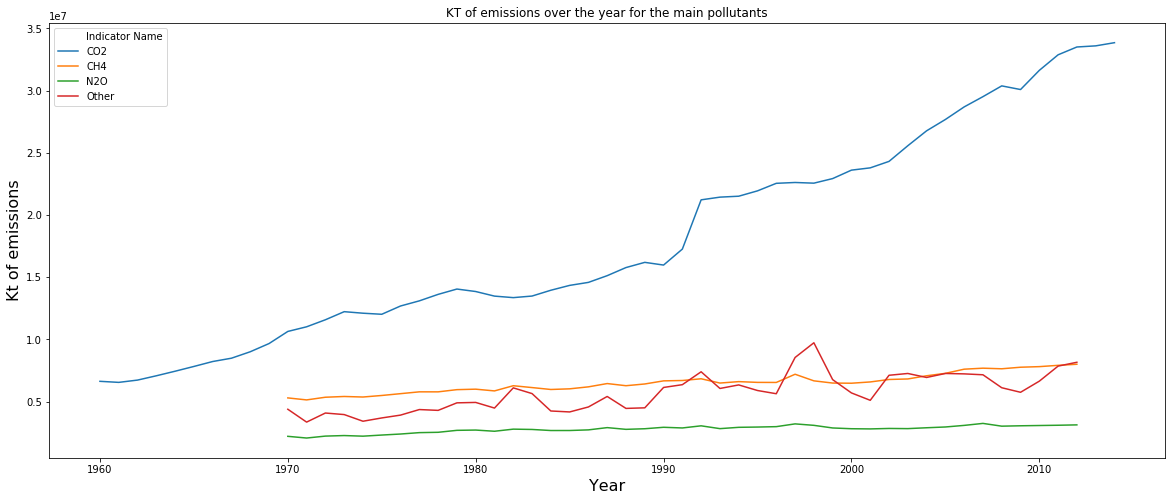

We can see that the biggest pollutant is CO2 and have been increasing since 1960.


In [13]:
plt.figure(figsize=(20,8))
data_1=Emissions_C_df[Emissions_C_df['Indicator Name'].isin(['CO2', 'CH4', 'N2O', 'Other'])].groupby(['Year','Indicator Name'])['Indicator Value'].sum().reset_index()
data_1['Year']=pd.to_datetime(data_1['Year'])

sns.lineplot(x='Year',y='Indicator Value',data=data_1,hue='Indicator Name')
plt.ylabel(ylabel='Kt of emissions',fontsize=16)
plt.xlabel(xlabel='Year',fontsize=16)
plt.title('KT of emissions over the year for the main pollutants')
plt.show()
print('We can see that the biggest pollutant is CO2 and have been increasing since 1960.')

---------

#### 7.2

What can you say about the *distribution* of emissions around the globe over the years? What information can you extract from the *tails* of these distributions over the years?

**Answer.**

In [14]:
by_country=Emissions_C_df.groupby(['Country Name'])['Indicator Value'].sum().reset_index()

print('As I expect the 5 most pollutant countries are the most development countries, in the other side, the 5 less pollutant countries are very small countries, but is weird that the indicator value is exactly 0, maybe here we dont have information')
by_country.sort_values('Indicator Value')

As I expect the 5 most pollutant countries are the most development countries, in the other side, the 5 less pollutant countries are very small countries, but is weird that the indicator value is exactly 0, maybe here we dont have information


,Country Name,Indicator Value
103,Kosovo,0.000000e+00
112,Liechtenstein,4.217050e+02
196,Tuvalu,5.355912e+02
143,Northern Mariana Islands,1.600365e+03
168,Sint Maarten (Dutch part),2.145195e+03
...,...,...
88,India,1.359151e+08
26,Brazil,1.396472e+08
158,Russian Federation,2.073588e+08
40,China,4.468048e+08


---------

#### 7.3
Compute a plot showing the behavior of each of the four main air pollutants for each of the main global regions in the ```Emissions_R_df``` data frame. The main regions are ```'Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia', 'Middle East & North Africa', 'East Asia & Pacific'``` and ```'North America'```. What conclusions can you make?

**Answer.**

Here we can see that East Asia & Pacific have had an exponential growth in pollutant emissions since 1960. In the other regions we can see a normal growth


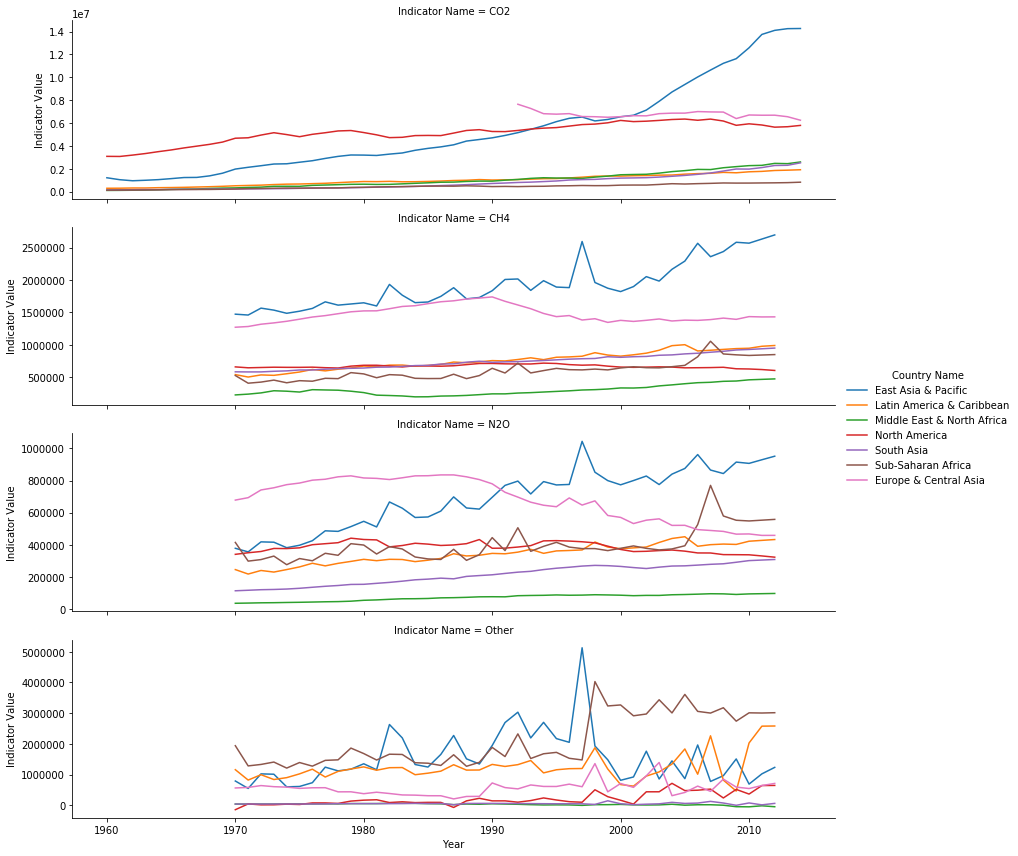

In [15]:
data_2=Emissions_R_df[Emissions_R_df['Indicator Name'].isin(['CO2', 'CH4', 'N2O', 'Other'])]
data_2=data_2[data_2['Country Name'].isin(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia', 'Middle East & North Africa', 'East Asia & Pacific','North America'])]
data_2=data_2.groupby(['Year','Country Name','Indicator Name'])['Indicator Value'].sum().reset_index()
data_2['Year']=pd.to_datetime(data_2['Year'])

gr=sns.FacetGrid(data_2,row='Indicator Name',hue='Country Name',sharex=True,sharey=False,aspect=4)
gr=(gr.map(plt.plot,'Year','Indicator Value').add_legend())
print('Here we can see that East Asia & Pacific have had an exponential growth in pollutant emissions since 1960. In the other regions we can see a normal growth')

---------

### Exercise 8:

In Exercise 7 we discovered some interesting features of the distribution of the emissions over the years. Let us explore these features in more detail. 

#### 8.1
Which are the top five countries that have been in the top 10 of ```CO2``` emitters over the years? Have any of these countries made efforts to reduce the amount of CO2 emissions over the last 10 years?

**Answer.**

The top five countries that have been in the top 10 of CO2 emitter are: 
['United States', 'Japan', 'China', 'United Kingdom', 'India']


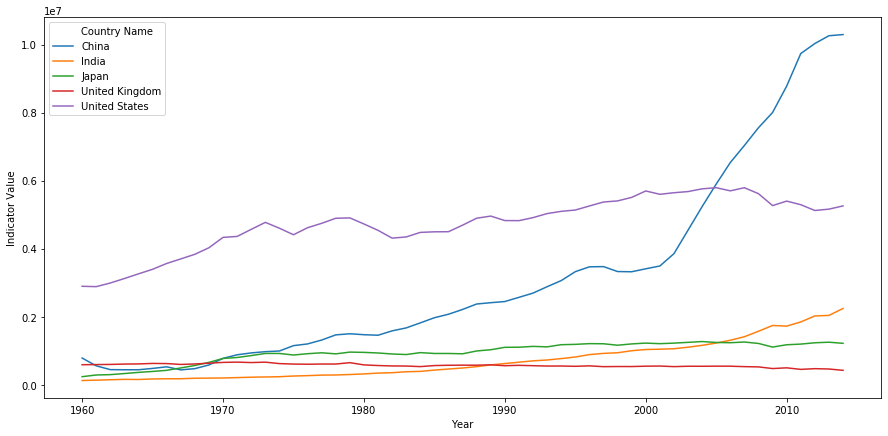

According to the plot, we can see that China and India have been increasing their pollution in the last 10 years. The other countries were making an effort to reduce the amount of CO2 emissions


In [16]:
list_countries_top=[]
for i in Emissions_C_df['Year'].unique():
    temporal=Emissions_C_df[Emissions_C_df['Year']==i]
    temporal=temporal[temporal['Indicator Name']=='CO2']
    temporal=temporal.groupby(['Country Name'])['Indicator Value'].sum().reset_index().sort_values('Indicator Value',ascending=False).head()
    temporal=list(temporal['Country Name'])
    list_countries_top.extend(temporal)
    
top5=pd.DataFrame(list_countries_top)
top5=top5.rename(columns={0:'country'})
top5_countries=list(top5.groupby(['country'])['country'].count().sort_values(ascending=False).head().index)
print('The top five countries that have been in the top 10 of CO2 emitter are: ')
print(top5_countries)

plt.figure(figsize=(15,7))
data_graph=Emissions_C_df[(Emissions_C_df['Country Name'].isin(top5_countries))&(Emissions_C_df['Indicator Name']=='CO2')].groupby(['Country Name','Year'])['Indicator Value'].sum().reset_index()
data_graph['Year']=pd.to_datetime(data_graph['Year'])
data_graph=data_graph[data_graph['Indicator Value']>0]
sns.lineplot(x='Year',y='Indicator Value',data=data_graph,hue='Country Name')

plt.show()

print('According to the plot, we can see that China and India have been increasing their pollution in the last 10 years. The other countries were making an effort to reduce the amount of CO2 emissions')

---------

#### 8.2

Are these five countries carrying out the burden of most of the emissions emitted over the years globally? Can we say that the rest of the world is making some effort to control their polluted gasses emissions over the years?

In [17]:
xx=Emissions_C_df[Emissions_C_df['Indicator Name']=='CO2'].groupby(['Country Name'])['Indicator Value'].sum().reset_index().sort_values('Indicator Value',ascending=False)
xx['percent_of_total']=xx.apply(lambda x: x['Indicator Value']/xx['Indicator Value'].sum(),axis=1)
xx['percent_acum']=xx['percent_of_total'].cumsum()
print(xx.head(10))
print('These countries represent more than the half of pollutant gasses emissions')

           Country Name  Indicator Value  percent_of_total  percent_acum
196       United States     2.597893e+08          0.262323      0.262323
39                China     1.704215e+08          0.172083      0.434406
94                Japan     5.197259e+07          0.052479      0.486886
86                India     3.876964e+07          0.039148      0.526033
153  Russian Federation     3.838037e+07          0.038755      0.564788
195      United Kingdom     3.100135e+07          0.031304      0.596092
34               Canada     2.341059e+07          0.023639      0.619731
66               France     2.145337e+07          0.021663      0.641393
92                Italy     1.978202e+07          0.019975      0.661368
71              Germany     1.961740e+07          0.019809      0.681177
These countries represent more than the half of pollutant gasses emissions


**Answer.**

---------

## The health impacts of air pollution

### Exercise 9:

One of the main contributions of poor health from air pollution is particulate matter. In particular, very small particles (those with a size less than 2.5 micrometres ($\mu$m)) can enter and affect the respiratory system. The ```PM2.5``` indicator measures the average level of exposure of a nation's population to concentrations of these small particles. The ```PM2.5_WHO``` measures the  percentage of the population who are exposed to ambient concentrations of these particles that exceed some thresholds set by the World Health Organization (WHO). In particular, countries with a higher ```PM2.5_WHO``` indicator are more likely to suffer from bad health conditions. 


#### 9.1

The client would like to know if there is any relationship between the ```PM2.5_WHO``` indicator and the level of income of the general population, as well as how this changes over time. What plot(s) might be helpful to solve the client's question?  What conclusion can you draw from your plot(s) to answer their question?

**Hint:** The DataFrame ```WDI_countries``` contains a column named ```Income Group```. 

**Answer.**

In [18]:
plt.figure(figsize=(20,8))
data_pm2=Emissions_C_df[Emissions_C_df['Indicator Name']=='PM2.5_WHO'].groupby('Income Group')['Indicator Value'].mean().reset_index()
data_pm2.sort_values('Indicator Value',ascending=False,inplace=True)
print('We can see that exist a relation between Income and the Indicator value for PM".5_ WHO, this means that in low income countries exist a higher percentage of population exposed to this particles than in high income countries.')
data_pm2

We can see that exist a relation between Income and the Indicator value for PM".5_ WHO, this means that in low income countries exist a higher percentage of population exposed to this particles than in high income countries.


,Income Group,Indicator Value
1,Low income,100.000000
2,Lower middle income,99.844565
3,Upper middle income,98.591258
0,High income,77.184224


<Figure size 1440x576 with 0 Axes>

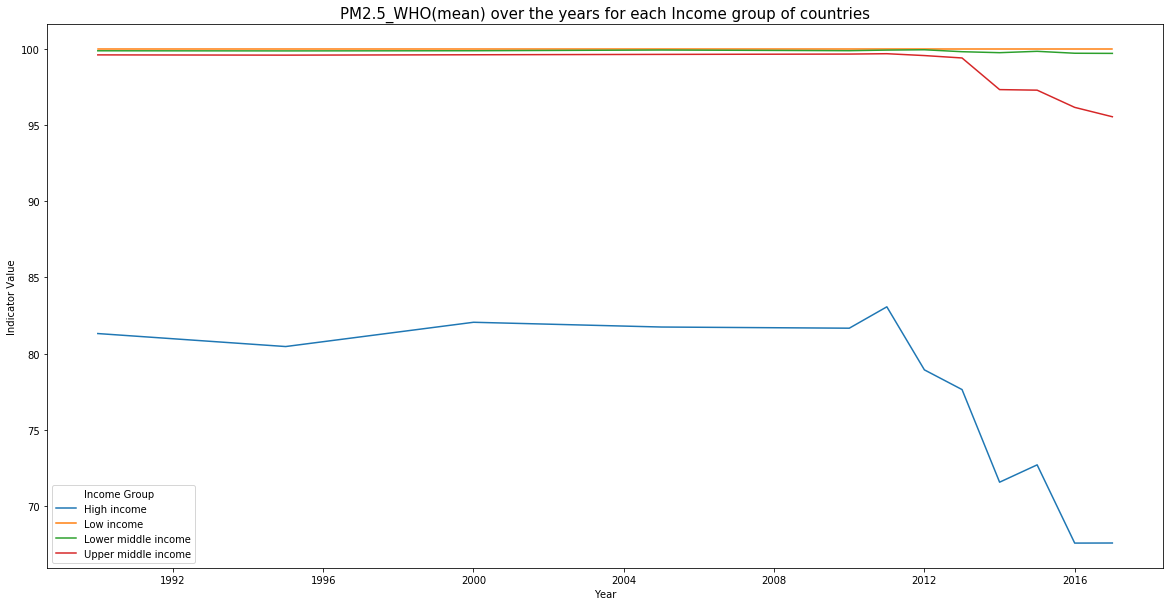

We can see that the High income countries have been working over the years (They were around 82% in 1990s and in 2017 they were around 65%). The upper middle income countries started their work around 2013, and the other groups are around the 100% (A terrible indicator value)


In [19]:
plt.figure(figsize=(20,10))

data_pm2_g=Emissions_C_df[Emissions_C_df['Indicator Name']=='PM2.5_WHO'].groupby(['Income Group','Year'])['Indicator Value'].mean().reset_index()
data_pm2_g['Year']= pd.to_datetime(data_pm2_g['Year'])

sns.lineplot(x='Year',y='Indicator Value',data=data_pm2_g,hue='Income Group')

plt.title('PM2.5_WHO(mean) over the years for each Income group of countries',fontsize=15)
plt.show()
print('We can see that the High income countries have been working over the years (They were around 82% in 1990s and in 2017 they were around 65%). The upper middle income countries started their work around 2013, and the other groups are around the 100% (A terrible indicator value)')

---------

#### 9.2

What do you think are the causes behind the results in Exercise 9.1?

**Answer.**

I think that in rich countries exist a better knowledge about the climate change and everything about it. For that reasons we see a best beahvior on this indicator. Also I can say that some Low income and lower middle income countries base their economies in the extraction of fossils fuels, increasing the pollutant gases.

---------

### Exercise 10:

Finally, our client is interested in investigating the impacts and relationships between **high levels of exposure to particle matter** and **the health of the population**. Coming up with additional data for this task may be infeasible for the client, thus they have asked us to search for relevant health data in the ```WDIdata.csv``` file and work with that. 

#### 10.1

Which indicators present in the file  ```WDISeries.csv``` file might be useful to solve the client's question? Explain.

**Note:** Naming one or two indicators is more than enough for this question. 

**Answer.**

There exists an indicator called **'Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)'**, its code is: **SH.STA.AIRP.P5** 

With this indicator we can relate the deaths and the air pollution.

---------

#### 10.2

Use the indicators provided in Exercise 10.1 to give valuable information to the client. 

**Answer.**

In [20]:
df2=WDI_ids[WDI_ids['Series Code'].isin(['SH.STA.AIRP.P5','EN.ATM.PM25.MC.M3'])]
df2=df2.merge(WDI_data,left_on='Series Code',right_on='Indicator Code',how='left')

df2.drop(columns=['Indicator Name_y'],inplace=True)
df2.rename(columns={'Indicator Name_x':'Indicator Name'},inplace=True)

df2=df2.melt(id_vars=(df2.iloc[:, 0:26]),value_vars=(df2.iloc[:, 26:]),var_name='Year',value_name=('Indicator Value'))

df2=df2[df2['Year']!='Unnamed: 64']
df2.dropna(subset=['Indicator Value'],inplace=True)

df2=df2.merge(WDI_country[['Country Code','Region','Income Group']],on='Country Code',how='left')



df2.replace('PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)','PM2.5',inplace=True)
df2.replace('Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)','MORT',inplace=True)
df2[df2['Indicator Name']=='MORT']['Year'].unique()

array(['2016'], dtype=object)

In [21]:
print('There is only one year with information of Mortality, we can say that in 2016 around 95 people in 100K people died because the particles in air')
df2.groupby(['Year','Indicator Name'])['Indicator Value'].mean().reset_index()


There is only one year with information of Mortality, we can say that in 2016 around 95 people in 100K people died because the particles in air


,Year,Indicator Name,Indicator Value
0,1990,PM2.5,31.191227
1,1995,PM2.5,30.880535
2,2000,PM2.5,30.930976
3,2005,PM2.5,30.651390
4,2010,PM2.5,30.872419
5,2011,PM2.5,31.131758
6,2012,PM2.5,30.340594
7,2013,PM2.5,29.790453
8,2014,PM2.5,28.683781
9,2015,PM2.5,30.579904


---------

#### 10.3

Extend the analysis above to find some countries of interest. These are defined as

* The countries that have a high mortality rate due to household and ambient air pollution, but with low PM2.5 exposure
* The countries that have a low mortality rate due to household and ambient air pollution, but with high PM2.5 exposure

**Answer.**

In [22]:
#I define the mean of pm2.5, i will say that if a value is bigger than mean its PM2.5 is High, and if lower is Low
avg_pm=df2[df2['Indicator Name']=='PM2.5']['Indicator Value'].mean()

inter=df2[df2['Indicator Name']=='PM2.5'].groupby(['Year','Country Name'])['Indicator Value'].mean().reset_index()
inter['horl_pm2.4']=inter['Indicator Value'].apply(lambda x: 'HIGH' if x>avg_pm else 'LOW')
inter['cy']=inter['Year'].astype(str)+inter['Country Name']
inter.drop(columns=['Year','Country Name','Indicator Value'],inplace=True)

inter2=df2[df2['Indicator Name']=='MORT'].groupby(['Year','Country Name'])['Indicator Value'].mean().reset_index()
inter2['horl_mort']=inter2['Indicator Value'].apply(lambda x: 'HIGH' if x>avg_pm else 'LOW')
inter2['cy']=inter2['Year'].astype(str)+inter2['Country Name']
inter2.drop(columns=['Year','Country Name','Indicator Value'],inplace=True)

df2['cy']=df2['Year'].astype(str)+df2['Country Name']

df2=df2.merge(inter,on='cy',how='left')
df2=df2.merge(inter2,on='cy',how='left')

df2.drop(columns=['cy'],inplace=True)
df2=df2[df2['Year'].astype(int)==2016]


In [23]:
df3=df2.groupby('Country Name')[['horl_pm2.4','horl_mort']].max().reset_index()

print(df3[(df3['horl_pm2.4']=='LOW') & (df3['horl_mort']=='HIGH')])
print(df3[(df3['horl_pm2.4']=='HIGH') & (df3['horl_mort']=='LOW')])
print('--------------------------------------------------')
print('We found some countries that have low pollution but high mortality, but we didn´t found countries with high pollution and low mortality')

      Country Name horl_pm2.4 horl_mort
1          Albania        LOW      HIGH
12      Azerbaijan        LOW      HIGH
16        Barbados        LOW      HIGH
17         Belarus        LOW      HIGH
19          Belize        LOW      HIGH
..             ...        ...       ...
231        Vanuatu        LOW      HIGH
232  Venezuela, RB        LOW      HIGH
233        Vietnam        LOW      HIGH
238         Zambia        LOW      HIGH
239       Zimbabwe        LOW      HIGH

[92 rows x 3 columns]
Empty DataFrame
Columns: [Country Name, horl_pm2.4, horl_mort]
Index: []
--------------------------------------------------
We found some countries that have low pollution but high mortality, but we didn´t found countries with high pollution and low mortality


---------

#### 10.4

Finally, we want to look at the mortality data by income. We expect higher income countries to have lower pollution-related mortality. Find out if this assumption holds. Calculate summary statistics and histograms for each income category and note any trends.

**Answer.**

In [24]:
pd.pivot_table(df2,index='Income Group',values='Indicator Value',aggfunc=['mean','median','max','min'])

,mean,median,max,min
,Indicator Value,Indicator Value,Indicator Value,Indicator Value
Income Group,,,,
High income,21.415261,15.300000,103.8,5.893757
Low income,114.637805,92.881593,324.1,15.086483
Lower middle income,84.205072,60.126275,307.4,10.537839
Upper middle income,43.155936,33.176617,177.7,7.972429


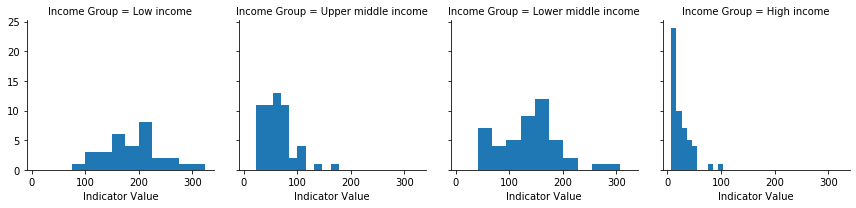

In [25]:
grph_income= sns.FacetGrid(df2[df2['Indicator Name']=='MORT'],col='Income Group')
grph_income=grph_income.map(plt.hist,'Indicator Value')


---------

#### 10.5

At the start, we asked some questions. Based on your analysis, provide a short answer to each of these:

1. Are we making any progress in reducing the amount of emitted pollutants across the globe?
    **No, inspite of some countries are doing efforts to reduce their pollution, another countries have been increasing a lot,   that cause that in global, we are not reducing the amount of emitted pollutants**
2. Which are the critical regions where we should start environmental campaigns?
   **Its important to start with 'East Asia and Pacific' and 'Sub-Saharan Africa'**
3. Are we making any progress in the prevention of deaths related to air pollution?
    **We only have information for one year, its not possible to see a progress now**
4. Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? 
    **The number of health-realated issues derived from air pollution is correlate with the income of country, if we are in a high income country probably we have less probability of die caused by air pollution**
    

**Answer.**

---------